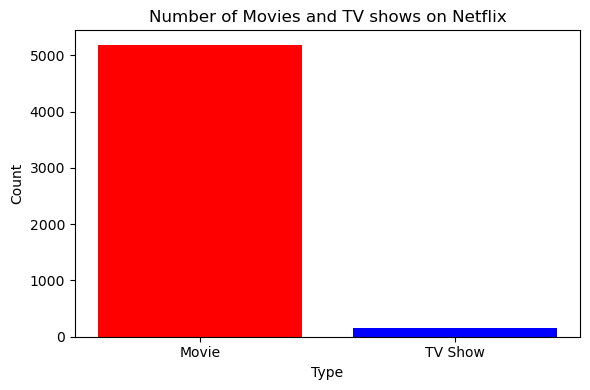

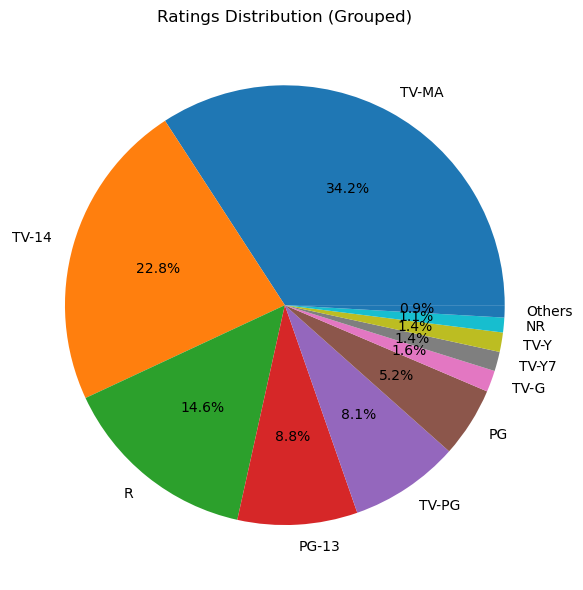

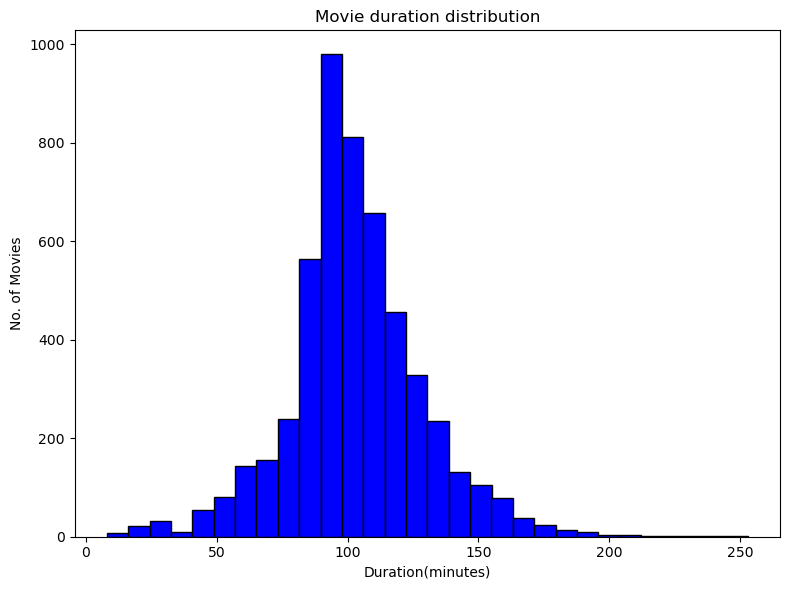

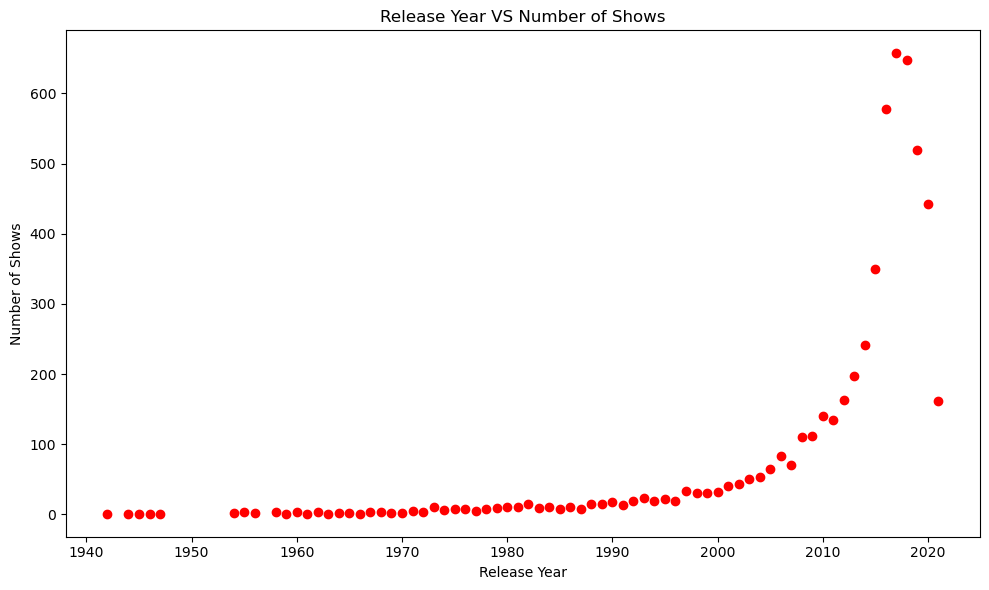

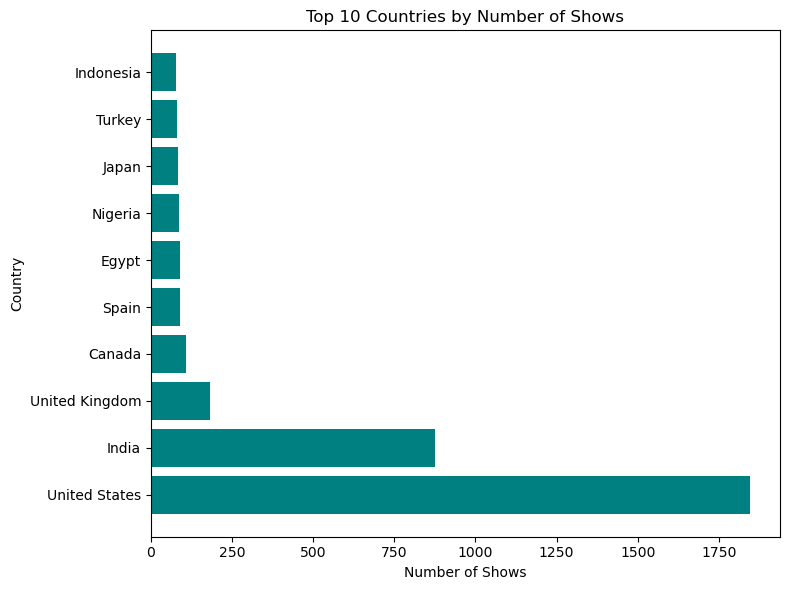

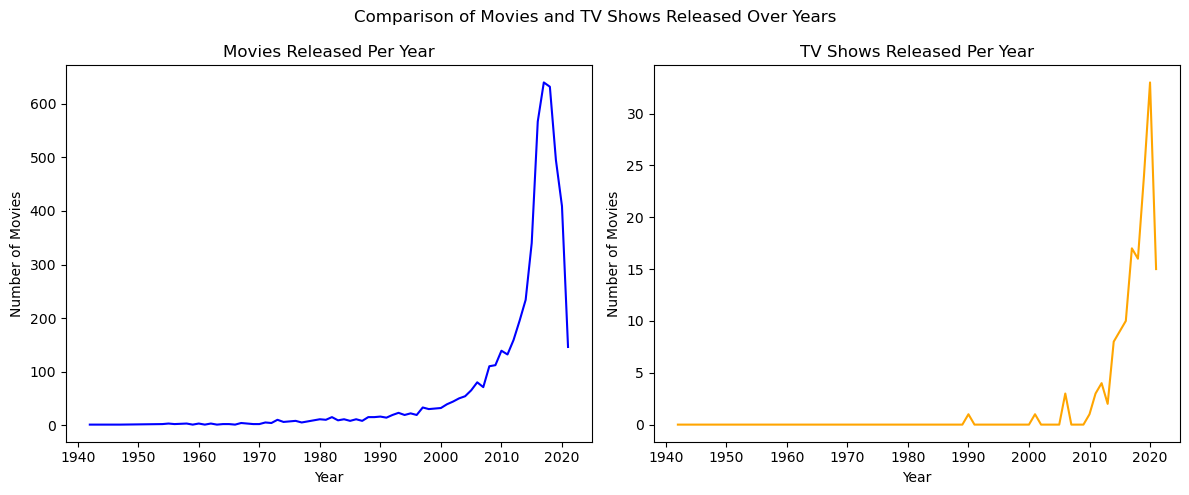

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
df = pd.read_excel("/Users/hitarthwadhwani/Desktop/Mini Projects/netflix_titles_data.xlsx")

df = df.dropna(subset=["show_id","type","title","director","cast","country","release_year","rating","duration"])
               
type_counts = df["type"].value_counts()

plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color=["red", "blue"])
plt.title("Number of Movies and TV shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("movies_tvshows.png")
plt.show()

rating_counts = df["rating"].value_counts()
plt.figure(figsize=(8,6))
top_ratings = rating_counts[rating_counts > 50]
others = rating_counts[rating_counts <= 50].sum()
top_ratings["Others"] = others
plt.pie(top_ratings, labels=top_ratings.index, autopct="%.1f%%")
plt.title("Ratings Distribution (Grouped)")
plt.tight_layout()
plt.savefig("content_ratings_pie")
plt.show()


movie_df = df[df["type"]== "Movie"].copy()
movie_df["duration_int"] = movie_df["duration"].str.replace("min", "").astype(int)

plt.figure(figsize=(8,6))

plt.hist(movie_df["duration_int"],bins=30,color= "blue", edgecolor= "black")
plt.title("Movie duration distribution")
plt.xlabel("Duration(minutes)")
plt.ylabel("No. of Movies")
plt.tight_layout()
plt.savefig("movies_duration_hist.png")
plt.show()

release_counts = df["release_year"].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index, release_counts.values, color= "red")
plt.title("Release Year VS Number of Shows") 
plt.xlabel("Release Year")
plt.ylabel("Number of Shows")
plt.tight_layout()
plt.savefig ("release_png")
plt.show()

country_counts = df["country"].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index, country_counts.values, color="teal")
plt.title("Top 10 Countries by Number of Shows")
plt.xlabel("Number of Shows")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig ("top10_countries.png")
plt.show()

content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)
fig, ax = plt.subplots(1,2, figsize=(12,5))

#Subplot 1 - Movies
ax[0].plot(content_by_year.index, content_by_year["Movie"], color="blue")
ax[0].set_title("Movies Released Per Year")
ax[0].set_xlabel("Year")
ax[0].set_ylabel('Number of Movies')

#Subplot 2 - TV Shows
ax[1].plot(content_by_year.index, content_by_year["TV Show"], color="orange")
ax[1].set_title("TV Shows Released Per Year")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Number of Movies")

fig.suptitle("Comparison of Movies and TV Shows Released Over Years")
plt.tight_layout()
plt.savefig("movies_tv_shows_comparison.png")
plt.show()




